In [ ]:
#project 11
%matplotlib inline
import numpy as np
import pandas as pd
import itertools
import copy
import networkx as nx
import matplotlib.pyplot as plt
from flask import g

import graphviz
from graphviz import Digraph
import queue
import time
import math
from timeit import default_timer as timer
import pylab as p

In [ ]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as CustomLogisticRegression
from networkx.algorithms.traversal.depth_first_search import dfs_edges
from networkx.algorithms import tree

In [ ]:

#file including
from google.colab import files
uploaded = files.upload()
#uploaded = files.upload()

Saving soc-sign-bitcoinotc.csv to soc-sign-bitcoinotc (2).csv


In [ ]:

df = pd.read_csv('soc-sign-bitcoinotc.csv',  names=['Source','Target', 'Weight', 'Time'])
df.head(5881)

,Source,Target,Weight,Time
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09
...,...,...,...,...
5876,1334,664,1,1.310688e+09
5877,1268,1334,1,1.310695e+09
5878,1334,1268,1,1.310695e+09
5879,1268,550,1,1.310696e+09


In [ ]:
Graph = {}

In [ ]:
df['Source'].max()

6000

In [ ]:
for i in range(len(df)):
    if (df['Source'][i] not in Graph.keys()):
        l = []
        l.append(df['Target'][i])
        l.append(df['Weight'][i])
        Graph[df['Source'][i]] = [l]
    else:
        l = []
        l.append(df['Target'][i])
        l.append(df['Weight'][i])
        Graph[df['Source'][i]] += [l]

In [ ]:
G = nx.DiGraph()

for i in range(len(df)):
    G.add_edges_from([(df['Source'][i], df['Target'][i])], color='r',weight=df['Weight'][i])


In [ ]:
all_nodes = set(G.nodes())

In [ ]:
len(all_nodes)


5881

Graphical Representation of Dataset 


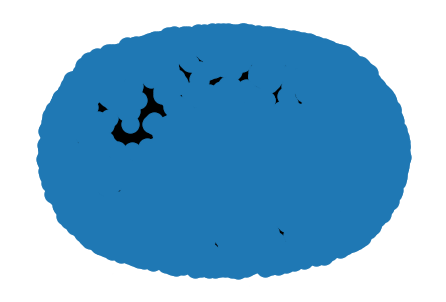

In [ ]:
print("Graphical Representation of Dataset ")
nx.draw(G)
p.show()

In [ ]:
print("Adjancency Matrix")
nx.to_pandas_adjacency(G)



Adjancency Matrix


,6,2,5,1,15,4,3,13,16,10,...,5996,5992,5997,5998,5999,6000,6002,6003,6004,6005
6,0.0,4.0,2.0,8.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,8.0,0.0,5.0,8.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,8.0,4.0,0.0,1.0,10.0,6.0,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
adj_list=nx.to_numpy_array(G)
adj_list_int = adj_list.astype(int)
adj_list_int

array([[0, 4, 2, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
nx.dfs_edges(G)

<generator object dfs_edges at 0x7f86ac735200>

In [ ]:
#BFS algoritm  function 

def BFS(adj, s, t):
 inf = 10**9 #float('Inf')
 d = [inf]*len(adj)
 queue = [s]
 d[s] = 0
 while len(queue) > 0:
  u = queue.pop(0)
  for v in adj[u]:
   if d[v] ==  inf:
    queue.append(v)
    d[v] = d[u] + 1
    if v == t:
     return d[t]
 return -1



In [ ]:
#DFS
def DFS(adj, x, y): 
 visited = [False]*len(adj)
 stack = [x]
 visited[x] = True
 while len(stack) > 0:
  u = stack.pop(-1)
  for v in adj[u]:
   if not visited[v]:
    stack.append(v)
    visited[v] = True
    if v == y:
     return 1
 return 0



In [ ]:
print("Dijkstra Path from 6 to 1")
start = timer()

print(nx.dijkstra_path(G, 6, 1))
end=timer()
print("Time of execution")
print(end-start)

Dijkstra Path from 6 to 1


ValueError: ignored

In [ ]:
print("DFS source=6 target=1")
start = timer()

result=DFS(adj_list_int, 6, 1)
print("Found:",result)
end=timer()
print("Time of execution")
print(end-start)

DFS source=6 target=1
Found: 1
Time of execution
0.0008482979992550099


In [ ]:
print("BFS source=6 target=1")
start = timer()

result=BFS(adj_list_int, 6, 1)
print("Found:",result)
end=timer()
print("Time of execution")
print(end-start)

BFS source=6 target=1
Found: 2
Time of execution
0.006947239000510308


In [ ]:
print("Bellman Ford Source=6 Target=1")
start = timer()
length, path = nx.single_source_bellman_ford(G, 6,target=1,weight='weight')
print("path: ",path)
print("length: ",length)

end=timer()
print("Time of execution")
print(end-start)

Bellman Ford Source=6 Target=1


NetworkXUnbounded: ignored

In [ ]:

print("Kruskal")
start = timer()
T=tree.minimum_spanning_edges(G, algorithm='kruskal', weight='weight', keys=True, data=True, ignore_nan=False)
edgelist = list(T)
print("edge list")
print(edgelist)
end=timer()
print("Time of execution")
print(end-start)

Kruskal


NetworkXNotImplemented: ignored

In [ ]:
print("prims")
start = timer()
T=tree.minimum_spanning_edges(G, algorithm='prim', weight='weight', keys=True, data=True, ignore_nan=False)
edgelist = list(T)
print("edge list")
print(edgelist)
end=timer()
print("Time of execution")
print(end-start)

prims


NetworkXNotImplemented: ignored